In [1]:
import pandas as pd
import numpy as np
#실제 그래프를 그릴 수 있는 서브 함수
import matplotlib.pyplot as plt
import seaborn as sns

#경고표시 생략(일시적으로 생략하는게 좋음) 
import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 지정 
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font",family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

# 머신러닝을 위한 모듈 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

import mglearn

from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# LinearSVC 분류알고리즘 중에서도 가장 어렵지만 성공률이 높은 서포프백터머신(SVM)
from sklearn.svm import LinearSVC

import statsmodels.api as am


## 1. 선형회귀모델 

- hypothesis
    - y=w[0]*x[0] + w[1]+x[1]+...+ b
    
+ 종류 
    - 일반 선형회귀 모델
    
    - 성능이 안나올 때  이 모델들을 사용
        - 릿지 선형회귀 모델
        - 라쏘 선형회귀 모델 
        - 엘라스틱넷 선형회귀 모델 

w[0]: 0.393906  b: -0.031804


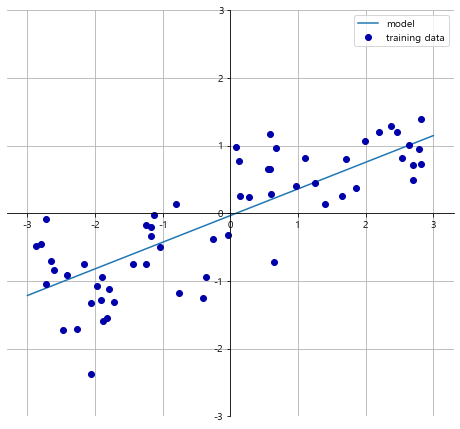

In [3]:
# 선형회귀 예제
mglearn.plots.plot_linear_regression_wave()

In [4]:
#직접 위 그래프를 그릴 수 있게 머신러닝 코드를 작성해보자
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
print('훈련 점수:',lr.score(X_train,y_train))
print('테스트 점수:',lr.score(X_test,y_test))

# 회귀선 기울기와 절편 구하기(테스트 점수를 구했으니)
print('기울기: {},절편:{}'.format(lr.coef_,lr.intercept_))

훈련 점수: 0.6700890315075756
테스트 점수: 0.65933685968637
기울기: [0.39390555],절편:-0.031804343026759746


In [7]:
# 통계적 결과와 비교해보기 
from scipy import stats #(1차원으로 넣어야함 )
result=stats.linregress(X_train.reshape(-1),y_train)
result
# 머신러닝과 차이가 있음 -> 이건 통계임 

LinregressResult(slope=0.39390555116733944, intercept=-0.031804343026759774, rvalue=0.8185896600297219, pvalue=6.4641460612798074e-12, stderr=0.042149264068325865, intercept_stderr=0.07819620564438914)

### (1) 사례 1: 전기 생산량과 소비량 
- 귀무 가설: 전기 생산량과 소비량은 상관관계가 없다.
- 대립 가설: 전기 생산량과 소비량은 상관관계가 있다. 

In [8]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]


In [9]:
##### 통계적 분석 

result = stats.linregress(X,y)
result

# p값이 pvalue=9.238421943157891e-05 은 0.05보다 작기때문에 대립가설 , 통계에서는 p값이 제일 중요했지만
# 그렇다면 머신러닝에서는 기울기가 제일 중요함(slope)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

In [142]:
##### 머신러닝으로 돌려보기 
# 데이터가 1차원이기 때문에 일단 배열로 바꿔주고 2차원으로 바꿔줘야함. 

X_arr= np.array(X)
X_arr=X_arr.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_arr,y)
print('기울기: {}, 절편: {}'.format(lr.coef_,lr.intercept_))


기울기: [0.49560324], 절편: 0.919581428068942


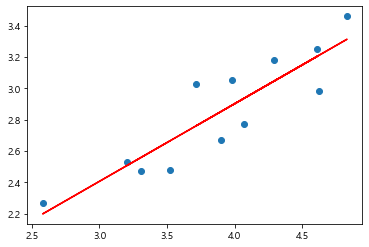

In [143]:
# 회귀선 그려보기 
plt.scatter(X,y) # 데이터 뿌리기
# 직선의 방정식 
plt.plot(X,lr.coef_ * X + lr.intercept_,c='red')

In [144]:
##### 생산량이 5일때 사용량은 얼마나 될까? -> 이런 대답을 구하기 위해 머신러닝을 하는 것임
print(lr.coef_*5+lr.intercept_)
print(lr.predict([[5]])) # 원하는 값을 2차원 배열로 넣어 주기만 하면 됨.

[3.39759761]
[3.39759761]


기울기: [0.49560324], 절편: 0.919581428068942
상산량 4일 때 사용량 : [2.90199437]


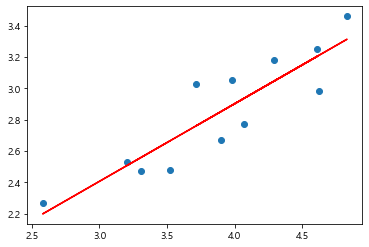

In [148]:
# p값 확인
from scipy import stats
result = stats.linregress(X,y)

#머신러닝
X_arr= np.array(X)
X_arr=X_arr.reshape(-1,1)
lr = LinearRegression()
lr.fit(X_arr,y)
print('기울기: {}, 절편: {}'.format(lr.coef_,lr.intercept_))

#그래프 그리기
plt.scatter(X,y) 
plt.plot(X,lr.coef_ * X + lr.intercept_,c='red')

#생산량이 4일때 사용량 
print('상산량 4일 때 사용량 :',lr.predict([[4]]))



### (2) 사례2 : 보스턴 주택 가격

In [3]:
boston = load_boston()
print(boston.data.shape) # 일단 데이터 개수를 확인하기 
# print(boston.target)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# 변수가 적어진다? -> 과소적함, 변수가 적어지면 단순해 지니까
# 변수가 많아진다? -> 과적합, 복잡해지니까

In [4]:
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [5]:

# 설명 계수 
print('훈련점수:',lr.score(X_train,y_train))
print('테스트 점수:',lr.score(X_test,y_test))
# 과적합의 경향이 보임. 선형 회귀는 하이퍼파라미터 따로 없음. 
# 이걸을 해결하기 위한 방법이 뭘까?? 

훈련점수: 0.7697699488741149
테스트 점수: 0.6354638433202129


In [32]:
# 같은 수의 데이턴데 변수를 늘림 
from mglearn.datasets import load_extended_boston

X,y = load_extended_boston()
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print('훈련점수:',lr.score(X_train,y_train))
print('테스트 점수:',lr.score(X_test,y_test))


(506, 104)
훈련점수: 0.9520519609032729
테스트 점수: 0.607472195966585


In [33]:
# 그렇다면 과적합을 해결하기 위한 방법은? - 원래는  데이터 추가확보, 하이퍼파라미터 조절, 데이터 전처리
# 선형회귀 분석의 장점은 간단하다는 것.

### (3) 릿지(ridge) 회귀 모델 

+ L2 규제(Regularization) - 단순화기키기 위해, 복잡해지는 것을 규제하겠다 이런것
+ MSE 항에 Penelty 항을 추가 
+ 알파를 크게하면 페널티의 효과가 커지고, 작게하면 그 반대가 된다. --> 알파가 하이퍼 파라미터
+ 모델을 단순하게 해주고 훈련셋에 대한 성능차이를 절충하는 효과

In [35]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)# alpha = 1.0 디폴트

#확실히 좋아짐
print('훈련점수:',ridge.score(X_train,y_train))
print('테스트 점수:',ridge.score(X_test,y_test))

훈련점수: 0.8857966585170941
테스트 점수: 0.7527683481744755


In [36]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)# alpha = 1.0 디폴트

# 모델이 더 단순해지긴 하지만 성능도 작아짐 --> gridsearch 와 같이 최적의 파라미터를 찾을 수 있음
print('훈련점수:',ridge10.score(X_train,y_train))
print('테스트 점수:',ridge10.score(X_test,y_test))

훈련점수: 0.7882787115369614
테스트 점수: 0.6359411489177311


In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)# alpha = 1.0 디폴트

# 규제를 풀어주니까 복잡해짐
print('훈련점수:',ridge01.score(X_train,y_train))
print('테스트 점수:',ridge01.score(X_test,y_test))

훈련점수: 0.9282273685001987
테스트 점수: 0.7722067936479814


(-25.0, 25.0)

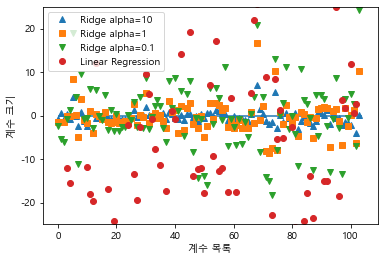

In [43]:
## 표로 차이를 보자
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'o',label='Linear Regression')
plt.legend()
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

#선 그리기
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
# 1일 때와 10일 때의 차이는? 1일때가 0을 기준으로 좀 더 퍼져 있다 그러니 ridge 는 퍼지는 것을 막아줌
# 퍼져 있으니까 과적합이 생기는 것. 
# 즉 가중치(기울기 w)에 a를 곱해서 영향을 제어하는 것. w는 어떤 값인줄 모르니까 

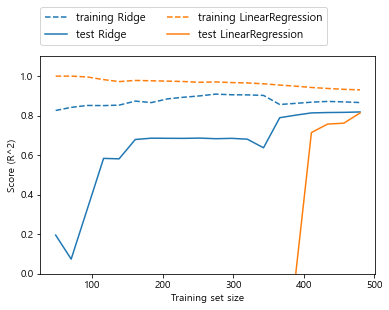

In [45]:
# 릿지 예시 
# 릿지의 경우 알파를 1로 고정 
mglearn.plots.plot_ridge_n_samples()

# 릿지회귀선은 처음부터 다 나옴 

# 회귀 그래프와 릿지와 공통점 
# --> 데이터가 많아질 수록 결과값이 수렴(비슷해짐)

In [56]:
print('사용한 특성의 수:', np.sum(ridge.coef_!=0))
print('사용한 특성의 수:', np.sum(ridge10.coef_!=0))
print('사용한 특성의 수:', np.sum(ridge01.coef_!=0))

사용한 특성의 수: 104
사용한 특성의 수: 104
사용한 특성의 수: 104


### (4) 라쏘(Lasso) 회귀모델

+ L1 규제 사용(L1 norm)
+ 알파를 크게하면 페널티의 효과가 커지고 작게하면 그 반대가 된다. 
+ 특성 선택이 자동으로 이루어진다. --> 변수를 골라낼 수 있다.
+ 라쏘는 가중치들이 0이 되지만 릿지는 가중치들은 0에 가까워질 뿐 0이 되지 않음.
------
+ 기존의 선형 회귀에선 적절한 가중치와 편향을 찾아내는 것이 관건이었다. 라쏘는 거기에 추가적인 제약 조건을 준다. 바로 MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다는 것이다.


In [46]:
from sklearn.linear_model import Lasso


In [58]:
lasso = Lasso().fit(X_train,y_train)
print('훈련점수:',lasso.score(X_train,y_train))
print('테스트 점수:',lasso.score(X_test,y_test))
print('사용한 특성의 수:', np.sum(lasso.coef_!=0))

훈련점수: 0.29323768991114607
테스트 점수: 0.20937503255272294
사용한 특성의 수: 4


In [68]:
lasso001 = Lasso(alpha=0.01).fit(X_train,y_train)
print('훈련점수:',lasso001.score(X_train,y_train))
print('테스트 점수:',lasso001.score(X_test,y_test))
print('사용한 특성의 수:', np.sum(lasso001.coef_!=0))

훈련점수: 0.8961122320864717
테스트 점수: 0.7677995670886713
사용한 특성의 수: 32


In [64]:
lasso0001 = Lasso(alpha=0.0001).fit(X_train,y_train)
print('훈련점수:',lasso0001.score(X_train,y_train))
print('테스트 점수:',lasso0001.score(X_test,y_test))
# 이래도 과적합....

훈련점수: 0.9420931515237063
테스트 점수: 0.6976541391663642


No handles with labels found to put in legend.


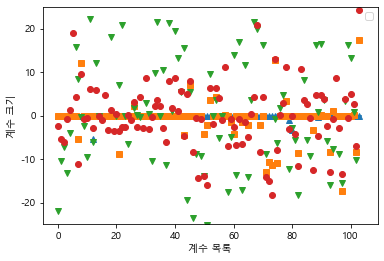

In [70]:
# 표로 그려보자

plt.legend()
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

#선 그리기
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.plot(lasso.coef_,"^",label='Lasso alpha=1')
plt.plot(lasso001.coef_,"s",label='Lasso alpha=0.01')
plt.plot(lasso0001.coef_,"v",label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1') # --> 라소의 0.01과 비슷, 그러나 둘의 차이는 사용의 특성의 수가 다름, 릿지는 변수 삭제 안함
# 과적합 -> 릿지 -> 라소 이런 순으로 과적합 해결
# 규제가 힘한 것임

### (5) 예제

#### 1) 키에 따라서 몸무게가 얼마인지 예측하는 프로그램


In [79]:
df = pd.read_csv('data/heights.csv')
type(df) # 머신러닝 할때는 2차원으로 입력을 받아야함. 
df


,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
...,...,...
195,65.80,120.84
196,66.11,115.78
197,68.24,128.30
198,68.02,127.47


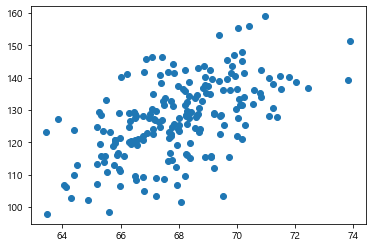

In [82]:
X=df['height']
y=df['weight']

plt.plot(X,y,'o')

In [83]:
# p값으로 확인해보기
from scipy import stats
result=stats.linregress(X,y)
result # 피값 유의미함 --> 예측해도 무방하다.

LinregressResult(slope=3.432676129271628, intercept=-106.02770644878126, rvalue=0.5568647346122992, pvalue=1.1029015151266264e-17, stderr=0.3638682118583795, intercept_stderr=24.734800508820637)

In [88]:
# 머신러닝으로 돌려보기

lr=LinearRegression()

# 입력값을 2차원으로 바꿔야함
lr.fit(X.values.reshape(-1,1),y)


LinearRegression()

In [87]:
##### 키가 70인 사람의 몸무게는 얼마일까?
lr.predict([[70]])

array([134.2596226])

#### 2) Boston Housing Sample

In [ ]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""


In [10]:
boston = load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
print(X_train.shape,X_test.shape)

(379, 13) (127, 13)


In [11]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head(10)

df['MEDV']=boston.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


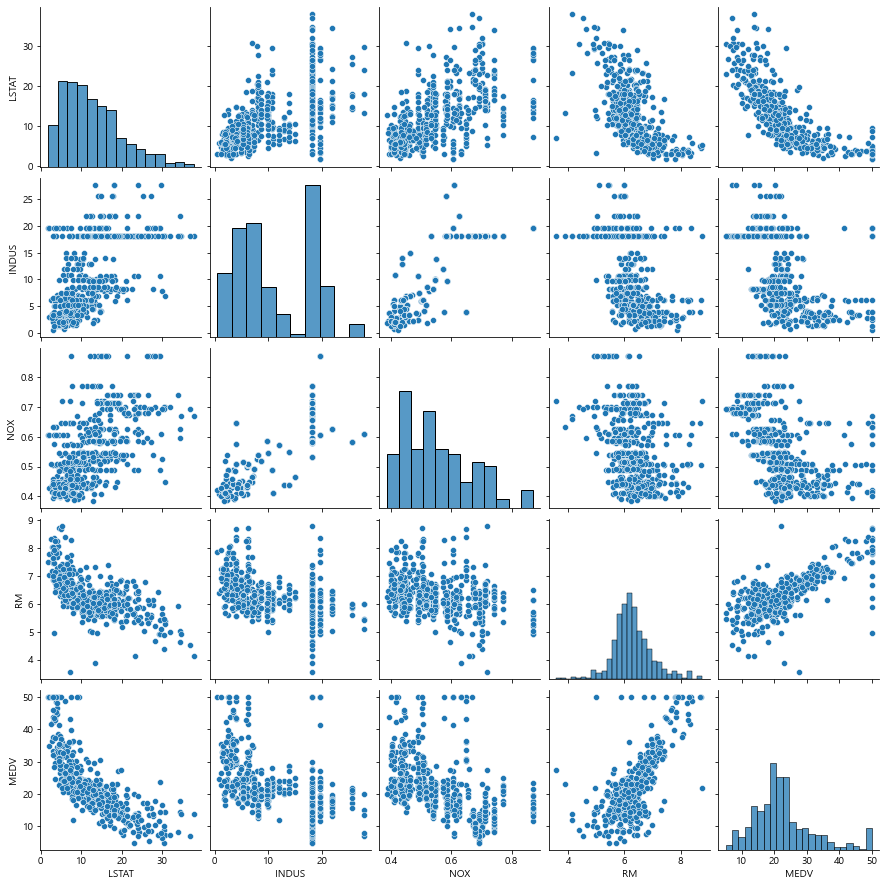

In [12]:
sns.pairplot(df[['LSTAT','INDUS','NOX','RM','MEDV']],size=2.5)

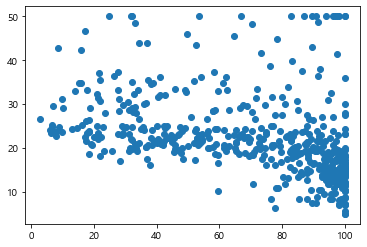

In [13]:
plt.scatter(df[['AGE']],df[['MEDV']])

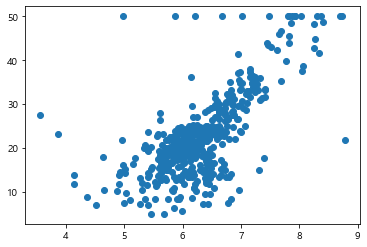

In [14]:
plt.scatter(df[['RM']],df[['MEDV']])

<AxesSubplot:>

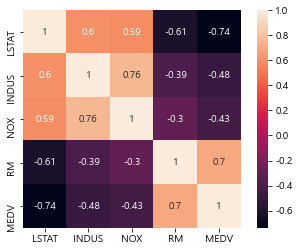

In [114]:
# 히트맵으로 상관관계 파악 
cols=['LSTAT','INDUS','NOX','RM','MEDV']
heat=np.corrcoef(df[cols].T)
sns.heatmap(heat,annot=True,yticklabels=cols,xticklabels=cols,square=True)

In [116]:
boston_model=LinearRegression()
boston_model.fit(X_train,y_train)

LinearRegression()

In [117]:
print('훈련점수:',boston_model.score(X_train,y_train))
print('테스트 점수:',boston_model.score(X_test,y_test))

훈련점수: 0.7697699488741149
테스트 점수: 0.6354638433202129


In [126]:
##### 방이 4개인 주택 가격은 얼마? 

X= df[['RM']].values
y= df[['MEDV']].values

lr = LinearRegression().fit(X,y)

house_price= lr.predict([[4]])
house_price * 1000

array([[1737.81514828]])

#### 3) Manhattan Housing Sample

In [127]:
df=pd.read_csv('data/manhattan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""


In [ ]:
#### 변수들의 관계를 시각화
#### 설명계수(훈련 결과와 테스트 결과 비교)
#### 필요할 경우 릿지나 라쏘 구현
#### 임대료 계산(e.g. 1,1,620,16,1,98,1,0,1,0,0,1,1,0 --> 2309$)

### 2. 로지스틱 회귀 모델
+ 가설 --> 비용 --> 최소비용 
+ 1차 함수를 2차함수로(sigmoid)

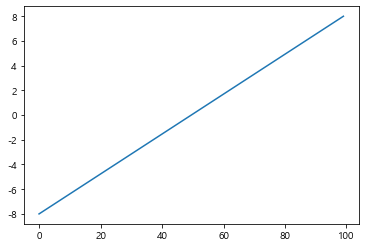

In [3]:
##### Sigmoid 그래프 그리기
X = np.linspace(-8,8,100) # X의 범위는 -8부터 8까지 100개
plt.plot(X)

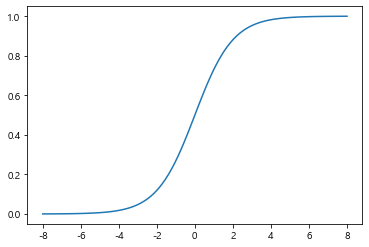

In [4]:
plt.plot(X,1/(1+np.exp(-X)))
# 직선을 곡선으로 바꾸는 로지스틱

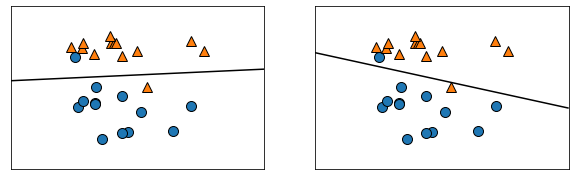

In [142]:
# 예시
X,y=mglearn.datasets.make_forge()

clf1= LinearSVC(C=1).fit(X,y) # 하이퍼파라미터 C 
clf2= LogisticRegression(C=1).fit(X,y)
# 두 알고리즘이 비슷함

_, axes=plt.subplots(1,2,figsize=(10,3))
# _(언더바) 의 는 무엇?? 변수에서는 리턴값을 받지 않겠다.
mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axes[0])
# 회귀선 그리기
mglearn.plots.plot_2d_separator(clf1,X,ax=axes[0])

mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=axes[1])
mglearn.plots.plot_2d_separator(clf2,X,ax=axes[1])

# 두 알고리즘이 굉장히 비슷함.
# knn의 단점 데이터가 많으면 시간이 오래 걸림 하지만 로지스틱회귀는 데이터가 많아도 
# 상관 없음 기냐 아니냐로 나뉘기에 

(<Figure size 720x216 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

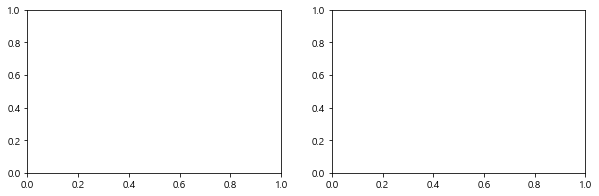

In [8]:
plt.subplots(1,2,figsize=(10,3))
# 리턴값이 2개임 
# 값의 위치정보, 그래프 틀 

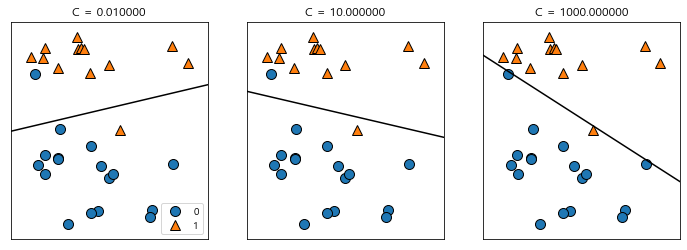

In [15]:
# 하이퍼 파라미터 C값이 클때 작을때의 차이 살펴보기 
# 복잡도는 오른쪽이 제일 높음
# 너무 복잡해지는 것을 막아 주는게 규제였는데  왼쪽이 규제가 강해지는것
# C값이 작아진다는 것은 규제가 강해져 복잡도 감소, C값이 커지면 규제를 풀어주니 복잡도 증가
mglearn.plots.plot_linear_svc_regularization()

### (1) C값에 따른 결과

In [16]:
cancer= load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=42)

In [24]:
# 선형회귀에서 L1을 쓰는애는 라쏘(변수를 제거), L2규제는 릿지
logreg= LogisticRegression(C=1,penalty='l2',max_iter=100000) #패널티(규제) 디폴트는 l2, 생략 가능
logreg.fit(X_train,y_train)
print('훈련점수 :',logreg.score(X_train,y_train))
print('테스트점수 :',logreg.score(X_test,y_test))
# 테스트 점수가 오히려 높으면 과소적합의 우려가 있음.

훈련점수 : 0.9624413145539906
테스트점수 : 0.965034965034965


In [28]:
#max_iter 훈련횟수가 100번으로 고정
logreg100= LogisticRegression(C=100,max_iter=100000)
logreg100.fit(X_train,y_train)
print('훈련점수 :',logreg100.score(X_train,y_train))
print('테스트점수 :',logreg100.score(X_test,y_test))
# C를 늘리니 과대적합(훈련데이터를 더 잘 맞추려 했다.)

훈련점수 : 0.9788732394366197
테스트점수 : 0.965034965034965


In [26]:
#max_iter 훈련횟수가 100번으로 고정 되어있음
logreg1000= LogisticRegression(C=1000,max_iter=100000)
logreg1000.fit(X_train,y_train)
print('훈련점수 :',logreg1000.score(X_train,y_train))
print('테스트점수 :',logreg1000.score(X_test,y_test))
# C를 더 늘리니 오히려 좋아졌다

훈련점수 : 0.9882629107981221
테스트점수 : 0.986013986013986


In [27]:
logreg001= LogisticRegression(C=0.01,max_iter=100000)
logreg001.fit(X_train,y_train)
print('훈련점수 :',logreg001.score(X_train,y_train))
print('테스트점수 :',logreg001.score(X_test,y_test))
# 줄이니 과소적합의 경향 

훈련점수 : 0.9460093896713615
테스트점수 : 0.972027972027972


(-5.0, 5.0)

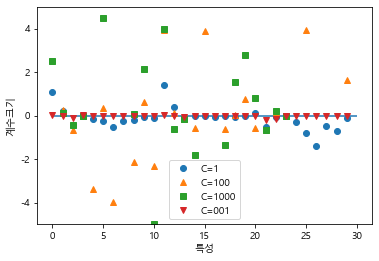

In [36]:
# 그래프로 한번 보자
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg1000.coef_.T,'s',label='C=1000')
plt.plot(logreg001.coef_.T,'v',label='C=001')
plt.legend()
plt.xlabel('특성')
plt.ylabel('계수크기')

# 중간선 그리기
plt.hlines(0,0,cancer.data.shape[1])

plt.ylim(-5,5)

# 하이퍼 파라미터 C는 모델을 단순화하는데 확실히 효과는 있음 하지만 C만 쓴게 아님

In [40]:
# L1 norm을 쓴다면?
logreg_l1= LogisticRegression(C=1,penalty='l1',solver='liblinear'
                              ,max_iter=100000) 
logreg_l1.fit(X_train,y_train)
print('훈련점수 :',logreg_l1.score(X_train,y_train))
print('테스트점수 :',logreg_l1.score(X_test,y_test))

훈련점수 : 0.960093896713615
테스트점수 : 0.958041958041958


In [41]:
# 선형회귀에서 L1을 쓰는애는 라쏘(변수를 제거), L2규제는 릿지
logreg= LogisticRegression(C=1,penalty='l2',max_iter=100000) #패널티(규제) 디폴트는 l2, 생략 가능
logreg.fit(X_train,y_train)
print('훈련점수 :',logreg.score(X_train,y_train))
print('테스트점수 :',logreg.score(X_test,y_test))
# 테스트 점수가 오히려 높으면 과소적합의 우려가 있음.

훈련점수 : 0.9624413145539906
테스트점수 : 0.965034965034965


In [ ]:
### l1 vs l2 의 경우 l1 이 약간 성능이 낮아짐

In [42]:
logreg1000_l1= LogisticRegression(C=1000,penalty='l1',solver='liblinear'
                              ,max_iter=100000) 
logreg1000_l1.fit(X_train,y_train)
print('훈련점수 :',logreg1000_l1.score(X_train,y_train))
print('테스트점수 :',logreg1000_l1.score(X_test,y_test))

# 과대 적합

훈련점수 : 0.9976525821596244
테스트점수 : 0.9370629370629371


In [43]:
logreg001_l1= LogisticRegression(C=0.01,penalty='l1',solver='liblinear'
                              ,max_iter=100000) 
logreg001_l1.fit(X_train,y_train)
print('훈련점수 :',logreg001_l1.score(X_train,y_train))
print('테스트점수 :',logreg001_l1.score(X_test,y_test))
# 과소 적합 경향

훈련점수 : 0.9107981220657277
테스트점수 : 0.951048951048951


(-5.0, 5.0)

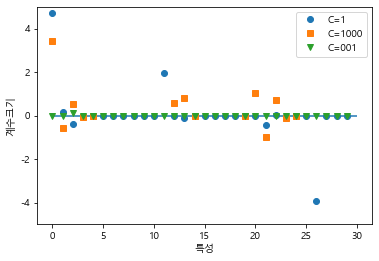

In [45]:
plt.plot(logreg_l1.coef_.T,'o',label='C=1')
plt.plot(logreg1000_l1.coef_.T,'s',label='C=1000')
plt.plot(logreg001_l1.coef_.T,'v',label='C=001')
plt.legend()
plt.xlabel('특성')
plt.ylabel('계수크기')

# 중간선 그리기
plt.hlines(0,0,cancer.data.shape[1])

plt.ylim(-5,5)

### (2).분류 모델 3가지 비교(KNN,LogisticRegression,LinearSCV)

In [50]:
cancer.data.shape
cancer.feature_names # 변수가 30개, 변수이름 확인하기 
cancer.target_names # 암의 여부, 악성/양성
np.bincount(cancer.target) # 크기가 불균형한데?

array([212, 357], dtype=int64)

In [54]:
##### LogisticRegression
cancer= load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=42)
model=LogisticRegression(max_iter=10000).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores


0.965034965034965

In [61]:
##### LinearSVC
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=42)
model=LinearSVC(max_iter=10000,dual=False).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

0.958041958041958

In [66]:
##### KNN
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=42)
model=KNeighborsClassifier().fit(X_train,y_train)# 이웃의 갯수 디폴트는 5개
scores=model.score(X_test,y_test)
scores

0.965034965034965

([<matplotlib.axis.XTick at 0x2987b7db580>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

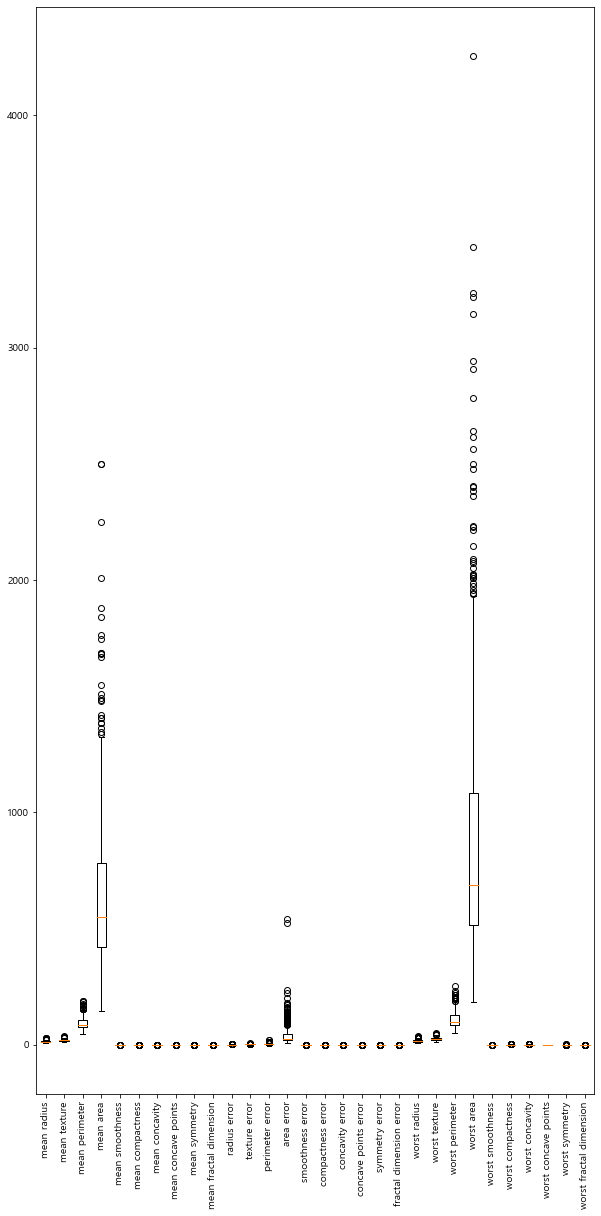

In [74]:
##### 이상치 확인
plt.figure(figsize=(10,20))
plt.boxplot(cancer.data)
# 변수명 추가
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90) # rotation=90 변수를 90도로 회전 

In [71]:
##### Standardization
#먼저 평균 구하기
m = cancer.data.mean(axis=0) # 열을 기준으로 평균
s = cancer.data.std(axis=0)

data1=(cancer.data-m)/s

([<matplotlib.axis.XTick at 0x2987b9ed520>,
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactness'),
  Text(27, 0, 'worst concavity'),
  Text(28, 0, 'worst concave points'),
  Text(29, 0, '

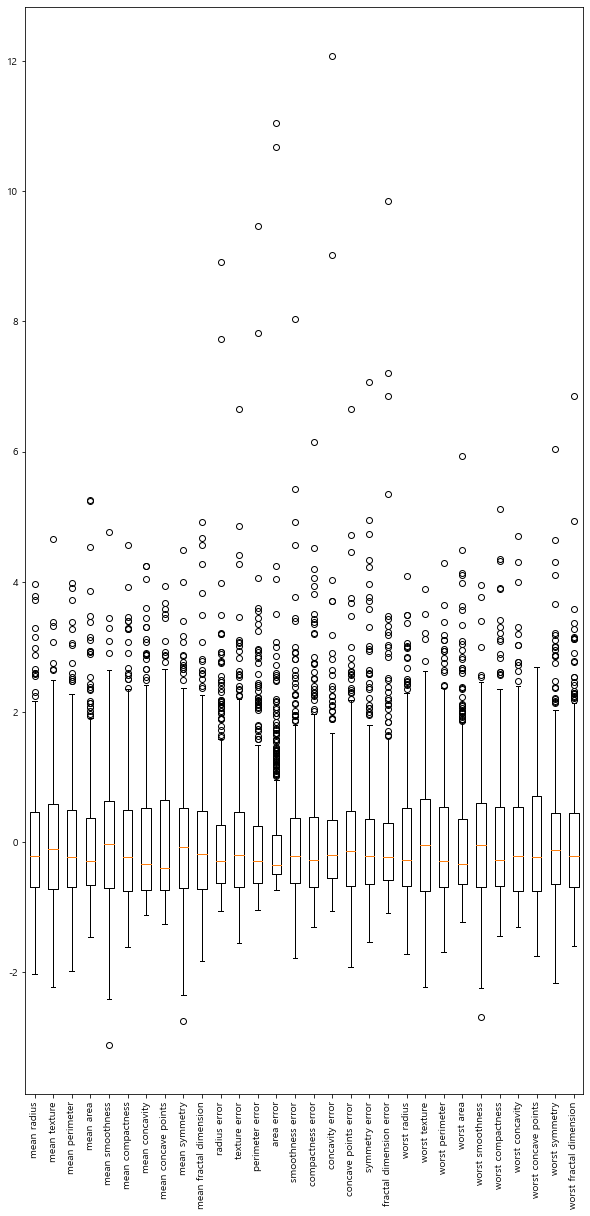

In [75]:
plt.figure(figsize=(10,20))
plt.boxplot(data1)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)

In [76]:
##### 정규화 후 LogisticRegression
cancer= load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(data1,cancer.target,
                                               random_state=42)
model=LogisticRegression(max_iter=10000).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

0.9790209790209791

In [143]:
##### 정규화 후 LinearSVC
X_train,X_test,y_train,y_test=train_test_split(data1,cancer.target,
                                               random_state=42)
model=LinearSVC(max_iter=10000,dual=False).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

0.965034965034965

In [144]:
##### 정규화 후 KNN --> 오히려 낮아짐(0.965034965034965)
X_train,X_test,y_train,y_test=train_test_split(data1,cancer.target,
                                               random_state=42)
model=KNeighborsClassifier().fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

##### 결론은 머신러닝의 성능은 하이퍼파라미터 뿐만아니라 전처리에서도 차이가 날 수 있다. 

0.958041958041958

In [146]:
##### C값 조정 + 전처리(정규화)

####LogisticRegression
cancer= load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(data1,cancer.target,
                                               random_state=42)
model=LogisticRegression(max_iter=10000,C=0.1).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

0.986013986013986

In [88]:
##### 정규화 LinearSVC + C값 조정
X_train,X_test,y_train,y_test=train_test_split(data1,cancer.target,
                                               random_state=42)
model=LinearSVC(max_iter=10000,dual=False,C=0.01).fit(X_train,y_train)
scores=model.score(X_test,y_test)
scores

0.993006993006993

-----------------------------

### 3. 다중 클래스 분류

- 지금까지는 두가지(이진 분류)로 분류를 했음 
- 그러나 항상 두가지중 선택하느냐만 있는것은 아님
- 로지스틱 회귀는 가능함.
- 이진분류를 다중분류로 하는 

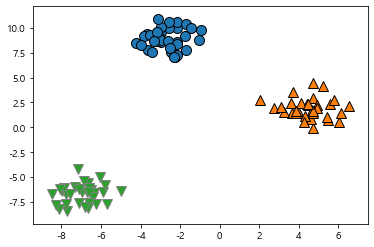

In [89]:
from sklearn.datasets import make_blobs

# 샘플 
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [90]:
model = LinearSVC().fit(X,y)
print(model.coef_)
# 결과가 3개가 나옴 LinearSVC는 이진분류인데..? 
# 3개니까 이진분류를 3번을 써야함. 그래서 3개의 기울기가 나온거

[[-0.17492068  0.23140526]
 [ 0.47621802 -0.06937218]
 [-0.18914259 -0.20399596]]


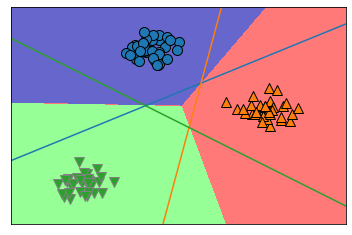

In [101]:
#그래프로 확인하기
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#입력값 정해주기
xline=np.linspace(-15,15)

for coef,intercept in zip(model.coef_,model.intercept_):
    plt.plot(xline,-(xline*coef[0]+intercept)/coef[1])
    
mglearn.plots.plot_2d_classification(model,X,fill=True,alpha=0.6)

-----------------
# 평가

+ 정확도(Accuracy) : 실제 데이터에서 예측데이터가 얼마나 같은지를 판단하는 지표
+ 오차 행렬(Confusion Matrix)
+ 정밀도(Precision)
+ 재현율(Recall)
+ F1 score
+ ROC,AUC

### (1) 정확도 (Accuracy)

+ 예측결과가 동일한 데이터 건수(맞은 갯수) / 전체 예측 데이터 건수
+ (TP + TN)/(TN+TP+FP+FN) --> 정확도 공식 
+ 정확도는 직관적으로 모델 예측 성능을 나타내는 평가지표
+ 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않음. 

In [4]:
from sklearn.datasets import load_digits # 0~ 9까지 이미지를 
digits=load_digits()
print(digits.data.shape)
print(digits.data)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


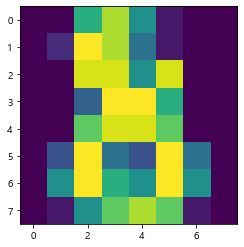

In [5]:
# 타겟이 7인것만 골라 보기
digits.data ==7
plt.imshow(digits.data[-1].reshape(8,8)) # 이미지의 종류를 2가지로 축소시켜서 --> 데이터의 불균형을 해결하고자함.

In [6]:
# 2진 분류로 바꾸기
y= (digits.target ==7).astype(int) # 숫자로 바꾸기 
np.unique(y)
np.bincount(y)

X_train,X_test,y_train,y_test=train_test_split(digits.data,y,
                                               random_state=42)
print(len(X_train),len(X_test))
print(np.bincount(y_test))

1347 450
[409  41]


In [7]:
from sklearn.base import BaseEstimator
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    

In [8]:
# 0으로 예측을 하려고 이렇게 만들어 놓은것 
np.zeros((len(X_test),1))


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [9]:
clf = MyFakeClassifier()
clf.fit(X_train,y_train)
pred= clf.predict(X_test)
print('정확도 :',accuracy_score(y_test,pred))
# 실제로 아무런 훈련도 안했는데 정확도가 90퍼나 나옴 그러니 데이터가 한쪽으로 치우쳐져 있을 때 정확도만 가지고 판단을 하면 안됨 

정확도 : 0.9088888888888889


In [10]:
##### 이를 보완하기 위해 정밀도, 재현율이라는 평가지표를 사용함. 
##### 이것을 사용하기 전에 정답을 맞춘것과 오답을 확인하는 것이 오차행렬

### Confusion Matrix

+ 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생했는지를 함께 나타내는 지표 
+ 얼마나 틀렸는지 얼마나 맞았는지 
+ TN, FP,FN,TP 

In [11]:
# 오차 행렬표 만들기 
confusion_matrix(y_test,pred)

array([[409,   0],
       [ 41,   0]], dtype=int64)

### (3) 정밀도와 재현율 

+ Positive의 예측성능에 조금 더 초점을 맞춘 평가지표
+ 정밀도 : TP/(FP + TP) : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
+ 정밀도는 예측값을 기준으로
+ 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 negative 음성인 데이터 예측을 positve 양성으로 잘못판단하게 되면 업무상 큰 영향이 발생하는 경우 
    - 스팸메일 판정


+ 재현율 : TP/(FN + TP) : 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터 비율 
+ 실제값을 기준으로
+ 재현율은 민감도(Sensitive) 또는 TPR(True Positive Rate)라고도 한다.
+ 재현율이 중요 지표인 경우는 실제 파지티브 양성 데이터를 네거티브로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - 암환자 판정, 보험사지 판정
+ 둘다 positive를 본다는 것이 공통점. 

In [12]:
df = pd.read_csv('data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
y= df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
##### 결측치 처리함수--> 결측치를 미리 파악하고(그래프나 등등으로) 진행할것
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

##### 머신러닝에서 불필요한 변수 제거(문자로 된 변수들)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

##### 문자로 된것은 숫자로 바꾸기 : 레이불 인코딩 --> 문자로 되어있지만 중요한 변수들
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    feature = ['Cabin','Sex','Embarked']
    
    for f in feature:
        le = LabelEncoder()
        le= le.fit(df[f])
        df[f] = le.transform(df[f])
    return df

##### 전처리 한번에 실행 
def transform_features(df):
    df= fillna(df)
    df=drop_features(df)
    df= format_features(df)
    
    return df

X= df.drop('Survived',axis=1) # y값 빼주기
X=transform_features(X)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,test_size=0.20)

In [19]:
lr = LogisticRegression(max_iter=1200000).fit(X_train,y_train)

In [20]:
lr.score(X_test,y_test)

0.8491620111731844

In [22]:
pred = lr.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [23]:
confusion=confusion_matrix(y_test, pred)
print('오차행렬 \n',confusion)
# 네거티브를 네거티브라 잘 맞춘게 104, 네거티브를 파지티브로 잘못 맞춘게 14개
# 파지티브를 네거티브라 잘못맞춘게 13개 파지티브를 파지티브라 잘 맞춘개 48개

오차행렬 
 [[104  14]
 [ 13  48]]


In [25]:
accuracy=accuracy_score(y_test,pred)
print('정확도 :',accuracy)
# 정말 제대로 맞췄는지 

정확도 : 0.8491620111731844


In [30]:
##### 정밀도 
precision = precision_score(y_test,pred)
print('정밀도: ',precision)

정밀도:  0.7741935483870968


In [32]:
##### 재현율 
recall = recall_score(y_test,pred)
print('재현율: ', recall)

재현율:  0.7868852459016393


In [ ]:
#### 한쪽으로 치우친 것은 좋지 않음 --> 둘다 비슷한 수준이어야 좋음 

### (4) 다중분류에서의 Consusion Matrix

In [34]:
data = [
    [5,0,0,0],
    [0,10,0,0],
    [0,0,15,0],
    [5,0,0,5]
]
df = pd.DataFrame(data, index=[i for i in 'ABCD'],columns=[i for i in 'ABCD'])
df

,A,B,C,D
A,5,0,0,0
B,0,10,0,0
C,0,0,15,0
D,5,0,0,5


<AxesSubplot:>

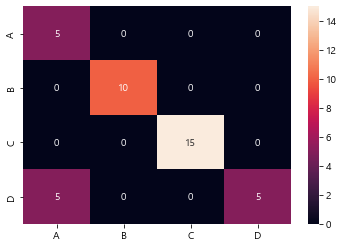

In [35]:
sns.heatmap(df,annot =True)

<AxesSubplot:>

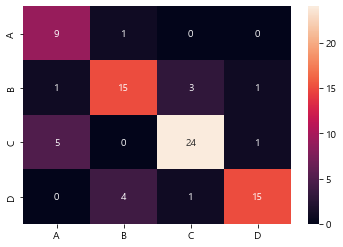

In [36]:
data = [[9,1,0,0],
       [1,15,3,1],
       [5,0,24,1],
       [0,4,1,15]]

df = pd.DataFrame(data, index=[i for i in 'ABCD'],columns=[i for i in 'ABCD'])
sns.heatmap(df,annot =True)

In [38]:
##### 정규화 

total = np.sum(data,axis=1)
data = data/total[:,None]
data

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

In [39]:
y_true=[2,0,2,2,0,1]
y_pred=[0,0,2,2,0,2]

confusion_matrix(y_true,y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

### (5) F1 Score

+ 재현율과 정밀도의 조화평균 
+ 재현율과 정밀도의 불균형을 맞춰주기 위해 
+ F1 Score는 정밀도와 재현율을 결합한 것
+ 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

In [41]:
y_true=[0,0,0,1,1,0,0]
y_pred=[0,0,0,0,1,1,1]
print(classification_report(y_true,y_pred,target_names=['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



### (6) ROC 와 AUC 

+ 지금까지는 수치로만 봤는데 시각화를 하자 --> 평가 결과를 시각화
+ 반드시 해야하는 것은 아닌데 하면 좋음 
+ 이진 분류에서 사용

In [42]:
# 샘플로 살펴보기 

from sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,random_state=0) # 샘플의 갯수, 변수의 갯수 


In [43]:
model = LogisticRegression().fit(X,y)

In [46]:
y_hat = model.predict(X)


In [48]:
# 성능 비교 --> 1나 빼고 다 맞음 
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [49]:
# 한눈에 보기 위해 오차표를 만들어 보자 
confusion_matrix(y,y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [50]:
print(classification_report(y,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       497
           1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(0, 0.5, 'True Positivie Rate(Recall)')

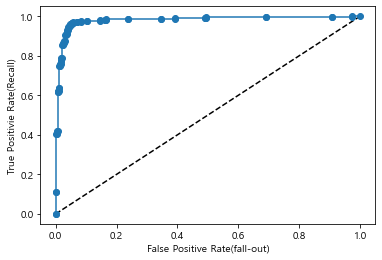

In [56]:
fpr,tpr,threshold=roc_curve(y,model.decision_function(X)) 
# 나온 값을 그래프로 그리자
# 첫번째 값은 fpr --> 파지티브를 잘못 예측한 값
# 두번째 값은 tpr --> 파지티브를 잘 예측한 값 
# 세번째 값은 기준선 

plt.plot([0,1],[0,1],'k--') # 일단 기준선 잡아 놓기
plt.plot(fpr,tpr,'o-',label='Logistic Regression')
plt.xlabel('False Positive Rate(fall-out)')
plt.ylabel('True Positivie Rate(Recall)')

### 사례1: 타이타닉
+ 성능을 제대로 측정했는지에 대한 관점 

In [3]:
df = pd.read_csv('data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#따로 모아두기 - 별도의 처리 없이 그대로 쓰는 변수 

cols_to_keep = ['Survived','Age','Fare']


In [5]:
# Pclass 는 One Hot Encoding으로 처리 --> 1이 좋은 건데 컴퓨터는 숫자가 큰것에 가중치를 두기에
dummy_class = pd.get_dummies(df['Pclass'],prefix='Pclass')
dummy_class


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [6]:
##### Sex도 one hot encoding으로 처리
dummy_sex = pd.get_dummies(df['Sex'],prefix='Sex')
dummy_sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
#### 지금까지 전처리한 필드들을 하나의 데이터프레임으로 합치기
df1=df[cols_to_keep].join(dummy_class.loc[:,'Pclass_1':])
df1

# 성별은 하나만 있어도 됨 
df1 = df1.join(dummy_sex.loc[:,'Sex_male'])
df1

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,1
887,1,19.0,30.0000,1,0,0,0
888,0,NaN,23.4500,0,0,1,0
889,1,26.0,30.0000,1,0,0,1


In [8]:
##### Survived 필드 제외 
train_col = df1.columns[1:]
train_col

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [9]:
##### 결측치 확인 
np.isnan(df1[train_col])
df1.info() # --> 나이에 있음을 확인

##### if 결측치  삭제한다면
# df1[train_col].dropna(axis=0)
# df1['Survived'].dropna(axis=0)

# 0으로 대체 
df1[train_col]=df1[train_col].fillna(0)
df1['Survived']=df1['Survived'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass_1  891 non-null    uint8  
 4   Pclass_2  891 non-null    uint8  
 5   Pclass_3  891 non-null    uint8  
 6   Sex_male  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 24.5 KB


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass_1  891 non-null    uint8  
 4   Pclass_2  891 non-null    uint8  
 5   Pclass_3  891 non-null    uint8  
 6   Sex_male  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 24.5 KB


In [18]:
# 통계 모델 구하기
import statsmodels.api as sm
model=sm.Logit(df1['Survived'],df1[train_col]).fit()
model.summary2()
# 기울기를 보고 대략적인 부분을 파악해 볼 수 있음.

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2021-11-24 10:13 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [19]:
model2 = LogisticRegression().fit(df1[train_col],df1['Survived'])

In [20]:
df1['predict']=model2.predict(df1[train_col])
df1.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


[[456  93]
 [100 242]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positivie Rate(Recall)')

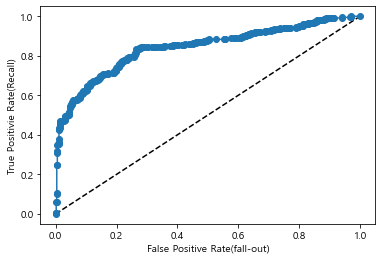

In [26]:
##### 오차표
print(confusion_matrix(df1['Survived'],df1['predict']))

#####  분류 레포트(정확도와 정밀도 재현율 한번에 보여주는)
print(classification_report(df1['Survived'],df1['predict']))

##### ROC
fpr,tpr,threshold=roc_curve(df1['Survived'],model2.decision_function(df1[train_col])) 
# 나온 값을 그래프로 그리자
# 첫번째 값은 fpr --> 파지티브를 잘못 예측한 값
# 두번째 값은 tpr --> 파지티브를 잘 예측한 값 
# 세번째 값은 기준선 

plt.plot([0,1],[0,1],'k--') # 일단 기준선 잡아 놓기
plt.plot(fpr,tpr,'o-',label='Logistic Regression')
plt.xlabel('False Positive Rate(fall-out)')
plt.ylabel('True Positivie Rate(Recall)')
# 곡선이 1에 가까울 수록 좋은 것임 

### 사례 2: 유방암 데이터셋
+ 좋은 성능을 뽑아내기 위한 방법에 대한 관점 

In [27]:
cancer = load_breast_cancer()
data=pd.DataFrame(cancer.data,columns=cancer.feature_names) # x 변수만 가져오기 
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
# y변수 추가 
data['class']=pd.Series(cancer.target,dtype='category')
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [30]:
X= data.loc[:,'mean radius':'worst fractal dimension']
y= data['class']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [34]:
##상수 추가하기
X1=sm.add_constant(X)
model=sm.OLS(y,X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          6.05e-153
Time:                        11:00:37   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [35]:
# 다 때려 넣었을 때 성능 비교 
log_reg = LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [36]:
# 오차표 만들기
pred = log_reg.predict(X_test)
confusion_matrix(y_test,pred)

array([[52,  1],
       [ 6, 84]], dtype=int64)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [40]:
##### p_value가 0.05 보다 작은 feature
X= data[['mean compactness','smoothness error','concavity error','worst radius'
        ,'worst area']]
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(max_iter=100000).fit(X_train,y_train)

X1=sm.add_constant(X)
model=sm.OLS(y,X1).fit()
print(model.summary())

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          6.37e-137
Time:                        11:11:55   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  